In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Load Datasets

In [2]:
data_folder = 'OurData/'
data_character = pd.read_csv(data_folder+'clean_data_character.csv')
data_success = pd.read_csv(data_folder+'clean_data_success.csv')
all_metrics = pd.read_csv(data_folder+'all_metrics.csv')
success_bechdel_script = pd.read_csv(data_folder+'success_bechdel_script.csv')

In [3]:
all_metrics = all_metrics.dropna(subset=['SuccessMetric'])
all_metrics.head()

,Unnamed: 0,Wiki_ID,Movie_ID,title,Runtime,Languages,Countries,Genres,Year,Net_revenue,rating,SuccessMetric,script_id,imdb_id,Bechdel_score,ratio_W/M,incl_score
0,233,103021,/m/0p_sc,Midnight Express,121.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hn10"": ""LGBT"", ...",1978,32700000.0,7.550000,0.773523,1155,tt0077928,0,0.083333,0.045285
1,298,5549065,/m/0ds11z,Sweeney Todd: The Demon Barber of Fleet Street,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/0fx2s"": ""Tra...",2007,102523164.0,7.150000,0.822595,5083,tt0408236,1,0.230769,0.307803
2,346,1033297,/m/0401sg,Resident Evil,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2002,69441078.0,6.500000,0.665816,3204,tt0120804,3,0.400000,0.598319
3,555,30548208,/m/0g9wdmc,The Iron Lady,104.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/07ssc"": ""United Ki...","{""/m/017fp"": ""Biography"", ""/m/07s9rl0"": ""Drama""}",2011,101943631.0,6.300000,0.656896,2634,tt1007029,3,0.666667,0.770197
4,562,1964091,/m/069dl1,Next,95.0,"{""/m/064_8sq"": ""French Language"", ""/m/04306rv""...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2007,6066841.0,6.050048,0.400119,1190,tt0435705,2,0.166667,0.425755


# Observe distributions through the years

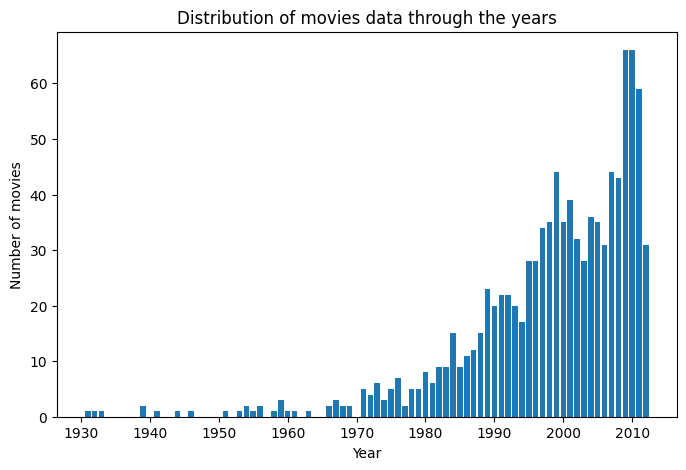

In [36]:
# Assuming 'gender' is the column with 'F' and 'M' values
movie_counts = all_metrics['Year'].value_counts()

# Plot the distribution of gender
plt.figure(figsize=(8, 5))
bars = plt.bar(movie_counts.index, movie_counts.values)

# Set plot labels and title
plt.title('Distribution of movies data through the years')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.xticks(rotation=0)
plt.show()

## Correlation between Success and Inclusion score

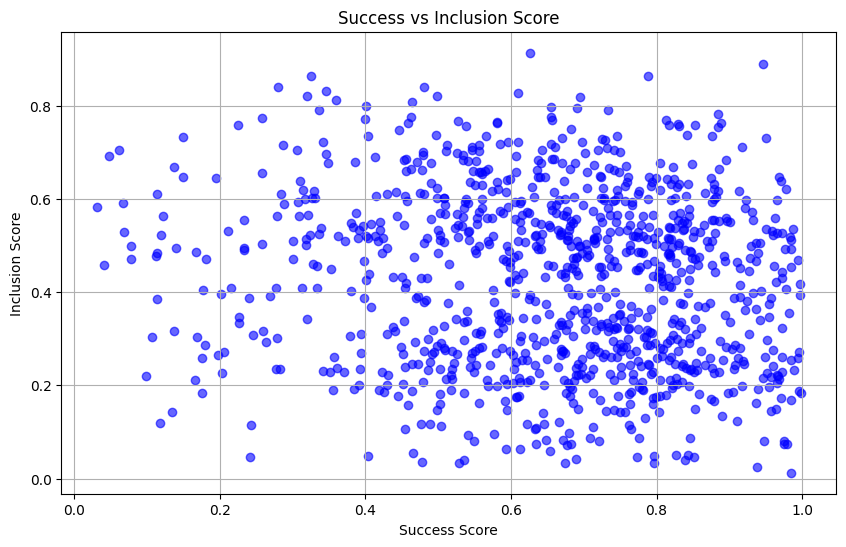

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(all_metrics['SuccessMetric'], all_metrics['incl_score'], alpha=0.6, color='blue')
plt.title('Success vs Inclusion Score')
plt.xlabel('Success Score')
plt.ylabel('Inclusion Score')
plt.grid(True)
plt.show()

In [5]:
from scipy import stats
pearson = stats.pearsonr(all_metrics['SuccessMetric'], all_metrics['incl_score'])
print(f"Pearson correlation has a coefficient of {pearson[0]:.3} which is higly significant with a p-value of {pearson[1]:.3}.")

spearman = stats.spearmanr(all_metrics['SuccessMetric'], all_metrics['incl_score'])
print(f"Spearman correlation has a coefficient of {spearman[0]:.3} which is higly significant with a p-value of {spearman[1]:.3}.")

Pearson correlation has a coefficient of -0.125 which is higly significant with a p-value of 6.9e-05.
Spearman correlation has a coefficient of -0.126 which is higly significant with a p-value of 6.3e-05.


## Correlation speach share and Success score

In [20]:
success_bechdel_script = success_bechdel_script.dropna(subset=['SuccessMetric'])

pearson = stats.pearsonr(success_bechdel_script['SuccessMetric'], success_bechdel_script['female_script'])
print(f"Pearson correlation has a coefficient of {pearson[0]:.3} which is higly significant with a p-value of {pearson[1]:.3}.")

spearman = stats.spearmanr(success_bechdel_script['SuccessMetric'], success_bechdel_script['female_script'])
print(f"Spearman correlation has a coefficient of {spearman[0]:.3} which is higly significant with a p-value of {spearman[1]:.3}.")

Pearson correlation has a coefficient of -0.154 which is higly significant with a p-value of 9.46e-07.
Spearman correlation has a coefficient of -0.156 which is higly significant with a p-value of 7.11e-07.


Pearson correlation has a coefficient of -0.154 which is higly significant with a p-value of 9.46e-07.


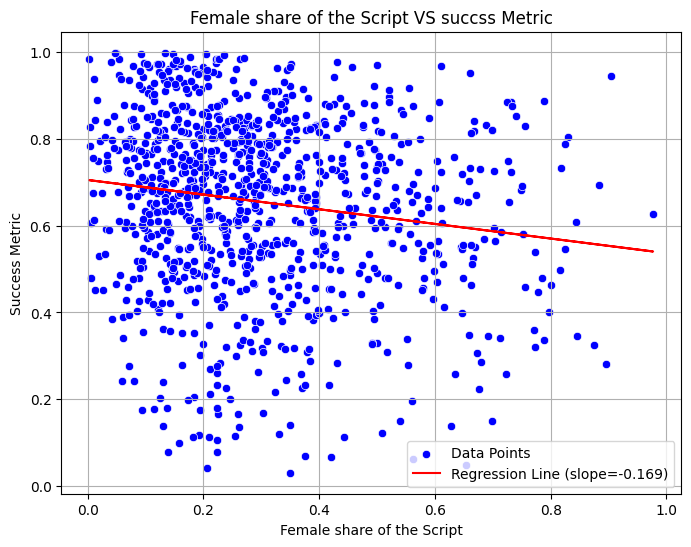

In [26]:
from scipy.stats import linregress
x = success_bechdel_script['female_script']
y = success_bechdel_script['SuccessMetric']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

print(f"Pearson correlation has a coefficient of {pearson[0]:.3} which is higly significant with a p-value of {pearson[1]:.3}.")

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line (slope={slope:.3f})')
plt.title('Female share of the Script VS succss Metric')
plt.xlabel('Female share of the Script')
plt.ylabel('Success Metric')
plt.legend()
plt.grid(True)
plt.show()

# Women share of script through the years

In [47]:
movies_by_year = success_bechdel_script.groupby('Year').agg(
    avg_incl_score=('incl_score', 'mean'),
    avg_female_script=('female_script', 'mean'),
    avg_success=('SuccessMetric', 'mean'),
    sample_count=('Year', 'size')
).reset_index()

movies_by_year = movies_by_year[movies_by_year['sample_count'] >= 5]

Pearson correlation has a coefficient of 0.463 which is significant with a p-value of 0.003.
Spearman correlation has a coefficient of 0.306 which is higly significant with a p-value of 0.0583.


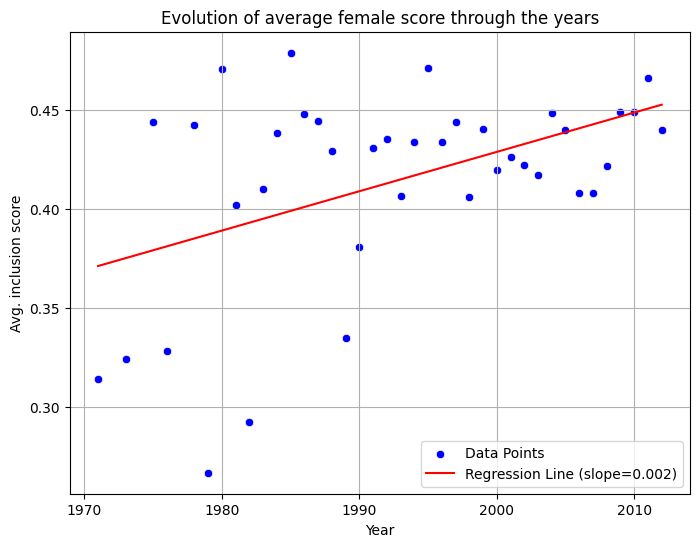

In [52]:
from scipy.stats import linregress
x =movies_by_year['Year']
y = movies_by_year['avg_incl_score']

slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

pearson = stats.pearsonr(x, y)
print(f"Pearson correlation has a coefficient of {pearson[0]:.3} which is significant with a p-value of {pearson[1]:.3}.")

spearman = stats.spearmanr(x, y)
print(f"Spearman correlation has a coefficient of {spearman[0]:.3} which is higly significant with a p-value of {spearman[1]:.3}.")

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, color='blue', label='Data Points')
plt.plot(x, regression_line, color='red', label=f'Regression Line (slope={slope:.3f})')
plt.title('Evolution of average female score through the years')
plt.xlabel('Year')
plt.ylabel('Avg. inclusion score')
plt.legend()
plt.grid(True)
plt.show()

La si je garde les films avec plus de 10 ca devient plus significant et plus trop corrélé

In [ ]:
def get_similarity(propensity_score1, propensity_score2):
    '''Calculate similarity for instances with given propensity scores'''
    return 1-np.abs(propensity_score1-propensity_score2)

